# Exemplo de rede neural MLP e Convolucional com Keras

## Importando as bibliotecas

In [1]:
import keras
import csv

/home/pedro/anaconda3/envs/Neurais2/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#creating train labels list and images list: train_labels and train_images
with open('sign_mnist_train.csv','r') as dataset_train:
    reader=csv.reader(dataset_train)
    next(dataset_train) #jump the first line of the csv
    train=list(reader)
    print("Number of train exemples:",len(train),"\n")
    a=len(train)
    print("Size of one exemple, with label:",len(train[1]),"\n")
    b=len(train[1])
    train_labels=[]
    train_images=[]
    for i in range(0,a):
        train_labels.append(train[i][0])
    print("train[3]:",train[3],"\n")
    print("Label of exemple 3:",train_labels[3],"\n")
    for i in range(0,a):
        train_images.append(train[i][1:b])
    print("Exemple 3 Image:",train_images[3])

Number of train exemples: 27455 

Size of one exemple, with label: 785 

train[3]: ['2', '211', '211', '212', '212', '211', '210', '211', '210', '210', '211', '209', '207', '208', '207', '206', '203', '202', '201', '200', '198', '197', '195', '192', '197', '171', '51', '52', '54', '212', '213', '215', '215', '212', '212', '213', '212', '212', '211', '211', '209', '208', '209', '206', '204', '203', '202', '201', '200', '199', '197', '193', '204', '149', '44', '49', '46', '215', '217', '218', '217', '216', '216', '217', '214', '213', '212', '212', '211', '210', '211', '208', '206', '206', '204', '204', '202', '202', '200', '194', '205', '120', '52', '41', '45', '218', '218', '218', '218', '218', '218', '218', '216', '216', '215', '213', '212', '213', '211', '209', '208', '209', '208', '208', '208', '207', '202', '198', '201', '90', '46', '44', '34', '219', '218', '220', '221', '220', '220', '218', '217', '219', '217', '215', '214', '214', '211', '201', '187', '186', '182', '179', '183', 

In [3]:
#creating test labels list and images list: test_labels and test_images
with open('sign_mnist_test.csv','r') as dataset_test:
    reader=csv.reader(dataset_test)
    next(dataset_test)
    test=list(reader)
    print("Number of train exemples:",len(test),"\n")
    a=len(test)
    print("Size of one exemple, with label:",len(test[1]),"\n")
    b=len(test[1])
    test_labels=[]
    test_images=[]
    for i in range(0,a):
        test_labels.append(test[i][0])
    print("test[3]:",test[3],"\n")
    print("Label of test exemple 3:",test_labels[3],"\n")
    for i in range(0,a):
        test_images.append(test[i][1:b])
    print("Test exemple 3 Image:",test_images[3])

Number of train exemples: 7172 

Size of one exemple, with label: 785 

test[3]: ['0', '203', '205', '207', '206', '207', '209', '210', '209', '210', '209', '208', '207', '207', '209', '208', '210', '210', '207', '209', '209', '208', '209', '210', '209', '207', '208', '209', '207', '206', '208', '209', '208', '208', '210', '211', '210', '211', '209', '209', '210', '211', '211', '209', '208', '211', '215', '210', '212', '212', '211', '211', '210', '210', '211', '210', '210', '209', '209', '210', '211', '210', '210', '212', '212', '211', '212', '210', '210', '212', '211', '223', '208', '162', '176', '219', '204', '206', '217', '216', '214', '212', '209', '211', '212', '209', '210', '211', '213', '215', '213', '211', '213', '213', '211', '216', '216', '179', '167', '228', '202', '161', '129', '132', '155', '141', '187', '210', '159', '197', '217', '211', '211', '210', '211', '211', '213', '214', '213', '213', '214', '215', '216', '245', '228', '181', '138', '184', '210', '175', '160', '76

## Analisando os dados

In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [5]:
dim=(b-1)
dim=math.sqrt(dim)
print("images are:", dim,"x",dim)

images are: 28.0 x 28.0


In [6]:
print(len(train_labels))
print(len(test_labels))

27455
7172


In [7]:
print(np.shape(train_images))
print(np.shape(test_images))

(27455, 784)
(7172, 784)


In [8]:
#convert data to np array and float
train_img=np.array(train_images)
train_img=train_img.astype(np.float)

test_img=np.array(test_images)
test_img=test_img.astype(np.float)

train_l=np.array(train_labels)
train_l=train_l.astype(np.float)

test_l=np.array(test_labels)
test_l=test_l.astype(np.float)

In [9]:
#reshapes data to list of 2D images
train_img=train_img.reshape((27455,28,28))
test_img=test_img.reshape((7172,28,28))

In [10]:
train_img[3]

array([[211., 211., 212., 212., 211., 210., 211., 210., 210., 211., 209.,
        207., 208., 207., 206., 203., 202., 201., 200., 198., 197., 195.,
        192., 197., 171.,  51.,  52.,  54.],
       [212., 213., 215., 215., 212., 212., 213., 212., 212., 211., 211.,
        209., 208., 209., 206., 204., 203., 202., 201., 200., 199., 197.,
        193., 204., 149.,  44.,  49.,  46.],
       [215., 217., 218., 217., 216., 216., 217., 214., 213., 212., 212.,
        211., 210., 211., 208., 206., 206., 204., 204., 202., 202., 200.,
        194., 205., 120.,  52.,  41.,  45.],
       [218., 218., 218., 218., 218., 218., 218., 216., 216., 215., 213.,
        212., 213., 211., 209., 208., 209., 208., 208., 208., 207., 202.,
        198., 201.,  90.,  46.,  44.,  34.],
       [219., 218., 220., 221., 220., 220., 218., 217., 219., 217., 215.,
        214., 214., 211., 201., 187., 186., 182., 179., 183., 192., 204.,
        204., 196.,  63.,  56.,  49.,  36.],
       [221., 221., 221., 222., 222

In [11]:
test_img[3]

array([[203., 205., 207., 206., 207., 209., 210., 209., 210., 209., 208.,
        207., 207., 209., 208., 210., 210., 207., 209., 209., 208., 209.,
        210., 209., 207., 208., 209., 207.],
       [206., 208., 209., 208., 208., 210., 211., 210., 211., 209., 209.,
        210., 211., 211., 209., 208., 211., 215., 210., 212., 212., 211.,
        211., 210., 210., 211., 210., 210.],
       [209., 209., 210., 211., 210., 210., 212., 212., 211., 212., 210.,
        210., 212., 211., 223., 208., 162., 176., 219., 204., 206., 217.,
        216., 214., 212., 209., 211., 212.],
       [209., 210., 211., 213., 215., 213., 211., 213., 213., 211., 216.,
        216., 179., 167., 228., 202., 161., 129., 132., 155., 141., 187.,
        210., 159., 197., 217., 211., 211.],
       [210., 211., 211., 213., 214., 213., 213., 214., 215., 216., 245.,
        228., 181., 138., 184., 210., 175., 160.,  76., 133., 143., 118.,
        180., 126., 170., 225., 211., 214.],
       [210., 212., 213., 213., 213

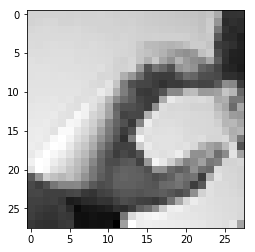

In [12]:
plt.imshow(train_img[3], cmap='gray')

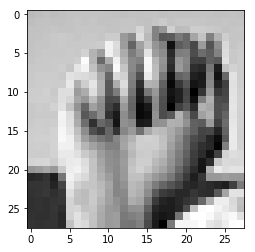

In [13]:
plt.imshow(test_img[3], cmap='gray')

In [14]:
print(train_l[3])
print(test_l[3])
#a=0,b=1,c=2,d=3,e=4,f=5,g=6,h=7,i=8,j=9,k=10,l=11,m=12,n=13,o=14,p=15,q=15,r=17,t=18,u=19,v=20,w=21,x=22,y=23

2.0
0.0


## Normalizando os dados

In [15]:
train_img = train_img.astype('float32') / 255
test_img = test_img.astype('float32') / 255

In [16]:
train_img[3]

array([[0.827451  , 0.827451  , 0.83137256, 0.83137256, 0.827451  ,
        0.8235294 , 0.827451  , 0.8235294 , 0.8235294 , 0.827451  ,
        0.81960785, 0.8117647 , 0.8156863 , 0.8117647 , 0.80784315,
        0.79607844, 0.7921569 , 0.7882353 , 0.78431374, 0.7764706 ,
        0.77254903, 0.7647059 , 0.7529412 , 0.77254903, 0.67058825,
        0.2       , 0.20392157, 0.21176471],
       [0.83137256, 0.8352941 , 0.84313726, 0.84313726, 0.83137256,
        0.83137256, 0.8352941 , 0.83137256, 0.83137256, 0.827451  ,
        0.827451  , 0.81960785, 0.8156863 , 0.81960785, 0.80784315,
        0.8       , 0.79607844, 0.7921569 , 0.7882353 , 0.78431374,
        0.78039217, 0.77254903, 0.75686276, 0.8       , 0.58431375,
        0.17254902, 0.19215687, 0.18039216],
       [0.84313726, 0.8509804 , 0.85490197, 0.8509804 , 0.84705883,
        0.84705883, 0.8509804 , 0.8392157 , 0.8352941 , 0.83137256,
        0.83137256, 0.827451  , 0.8235294 , 0.827451  , 0.8156863 ,
        0.80784315, 0.8078

### Entrada da rede convolucional

In [17]:
from keras import backend as K

In [18]:
img_rows = 28
img_cols = 28

if K.image_data_format() == 'channels_first':
    train_img = train_img.reshape(train_img.shape[0], 1, img_rows, img_cols)
    test_img = test_img.reshape(test_img.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_img = train_img.reshape(train_img.shape[0], img_rows, img_cols, 1)
    test_img = test_img.reshape(test_img.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [19]:
print('input shape:', input_shape)

input shape: (28, 28, 1)


In [20]:
np.shape(test_img)

(7172, 28, 28, 1)

### Transformando rótulos em dados categóricos

In [21]:
from keras.utils import to_categorical

train_l = to_categorical(train_l)
test_l = to_categorical(test_l)

In [22]:
train_l[3]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
np.shape(train_l)

(27455, 25)

## Definindo a rede

model: https://keras.io/models/model/

layers: https://keras.io/layers/about-keras-layers/

In [24]:
from keras import models
from keras import layers

### Rede Convolucional

In [51]:
network = models.Sequential()
network.add(layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
network.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network.add(layers.MaxPooling2D(pool_size=(2, 2)))
network.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network.add(layers.MaxPooling2D(pool_size=(2, 2)))
network.add(layers.Dropout(0.25))                                                  
network.add(layers.Flatten())
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dropout(0.5))                                                
network.add(layers.Dense(25, activation='softmax'))

In [52]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 26, 26, 256)       295168    
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 26, 26, 256)       590080    
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 26, 26, 256)       590080    
__________

In [53]:
#allows two gpu usage (2 GTX1080)
network = keras.utils.multi_gpu_model(network,gpus=2)

## Compilando a rede

optimizers: https://keras.io/optimizers/

loss funcitons: https://keras.io/losses/

metrics: https://keras.io/metrics/

In [54]:
sgd=keras.optimizers.SGD(momentum=0.8)
network.compile(optimizer=sgd, 
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

## Treinando

In [55]:
earlystop=keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=20)
history = network.fit(train_img, train_l,
                          batch_size=128,
                          epochs=500,
                          validation_split=0.2, #0.3?
                          callbacks=[earlystop])

Train on 21964 samples, validate on 5491 samples
Epoch 1/500
21964/21964 [==============================] - 30s 1ms/step - loss: 3.2071 - acc: 0.0440 - val_loss: 3.1964 - val_acc: 0.0479
Epoch 2/500
21964/21964 [==============================] - 29s 1ms/step - loss: 3.1935 - acc: 0.0452 - val_loss: 3.1878 - val_acc: 0.0479
Epoch 3/500
21964/21964 [==============================] - 29s 1ms/step - loss: 3.1894 - acc: 0.0439 - val_loss: 3.1827 - val_acc: 0.0479
Epoch 4/500
21964/21964 [==============================] - 30s 1ms/step - loss: 3.1772 - acc: 0.0504 - val_loss: 3.0967 - val_acc: 0.1289
Epoch 5/500
21964/21964 [==============================] - 30s 1ms/step - loss: 1.9895 - acc: 0.3894 - val_loss: 0.8050 - val_acc: 0.7685
Epoch 6/500
21964/21964 [==============================] - 30s 1ms/step - loss: 0.5048 - acc: 0.8319 - val_loss: 0.1188 - val_acc: 0.9758
Epoch 7/500
21964/21964 [==============================] - 30s 1ms/step - loss: 0.1447 - acc: 0.9499 - val_loss: 0.0336 - v

Epoch 58/500
21964/21964 [==============================] - 29s 1ms/step - loss: 1.7506e-04 - acc: 1.0000 - val_loss: 1.5776e-07 - val_acc: 1.0000
Epoch 59/500
21964/21964 [==============================] - 29s 1ms/step - loss: 3.2031e-04 - acc: 0.9999 - val_loss: 3.1513e-07 - val_acc: 1.0000
Epoch 60/500
21964/21964 [==============================] - 29s 1ms/step - loss: 0.0016 - acc: 0.9995 - val_loss: 2.8537e-06 - val_acc: 1.0000
Epoch 61/500
21964/21964 [==============================] - 29s 1ms/step - loss: 0.0012 - acc: 0.9996 - val_loss: 1.7030e-07 - val_acc: 1.0000
Epoch 62/500
21964/21964 [==============================] - 29s 1ms/step - loss: 5.8940e-04 - acc: 0.9998 - val_loss: 1.2688e-07 - val_acc: 1.0000
Epoch 63/500
21964/21964 [==============================] - 29s 1ms/step - loss: 0.0034 - acc: 0.9994 - val_loss: 0.0148 - val_acc: 0.9973
Epoch 64/500
21964/21964 [==============================] - 29s 1ms/step - loss: 0.0022 - acc: 0.9994 - val_loss: 1.2627e-06 - val_acc

21964/21964 [==============================] - 29s 1ms/step - loss: 0.0013 - acc: 0.9998 - val_loss: 2.3545e-07 - val_acc: 1.0000
Epoch 115/500
21964/21964 [==============================] - 29s 1ms/step - loss: 1.1150e-04 - acc: 1.0000 - val_loss: 1.4173e-07 - val_acc: 1.0000
Epoch 116/500
21964/21964 [==============================] - 29s 1ms/step - loss: 6.7421e-04 - acc: 0.9997 - val_loss: 1.6824e-07 - val_acc: 1.0000
Epoch 117/500
21964/21964 [==============================] - 29s 1ms/step - loss: 6.3093e-04 - acc: 0.9997 - val_loss: 1.7567e-07 - val_acc: 1.0000
Epoch 118/500
21964/21964 [==============================] - 29s 1ms/step - loss: 1.7841e-04 - acc: 0.9999 - val_loss: 1.2885e-07 - val_acc: 1.0000
Epoch 119/500
21964/21964 [==============================] - 29s 1ms/step - loss: 1.2619e-04 - acc: 1.0000 - val_loss: 1.2147e-07 - val_acc: 1.0000
Epoch 120/500
21964/21964 [==============================] - 29s 1ms/step - loss: 1.9106e-04 - acc: 1.0000 - val_loss: 1.2426e-07 

## Avaliando a rede Convolucional

In [56]:
test_loss, test_acc = network.evaluate(test_img, test_l)

7172/7172 [==============================] - 5s 687us/step


In [57]:
print('test accuracy:', test_acc)

test accuracy: 0.9736475181260458


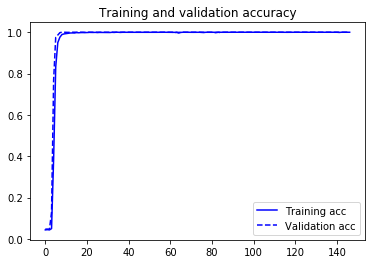

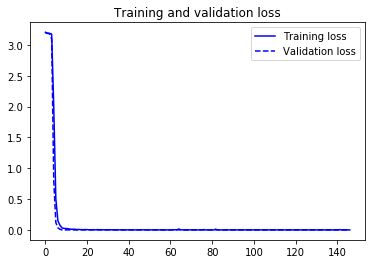

In [58]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Saving Network

In [63]:
import h5py

In [64]:
#create simple model, not parallel
network2 = models.Sequential()
network2.add(layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
network2.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
network2.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
network2.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
network2.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network2.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network2.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
network2.add(layers.MaxPooling2D(pool_size=(2, 2)))
network2.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network2.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network2.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network2.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network2.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network2.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
network2.add(layers.MaxPooling2D(pool_size=(2, 2)))
network2.add(layers.Dropout(0.25))                                                  #mudar para 0.25
network2.add(layers.Flatten())
network2.add(layers.Dense(256, activation='relu'))
network2.add(layers.Dense(256, activation='relu'))
network2.add(layers.Dropout(0.5))                                                  #mudar para 0.5
network2.add(layers.Dense(25, activation='softmax'))

network2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_92 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 26, 26, 128)       73856     
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 26, 26, 128)       147584    
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 26, 26, 256)       295168    
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 26, 26, 256)       590080    
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 26, 26, 256)       590080    
__________

In [65]:
#compiling new model
#sgd=keras.optimizers.SGD(momentum=0.8)
network2.compile(optimizer='sgd',
                 loss=keras.losses.categorical_crossentropy,
                 metrics=['accuracy'])

In [66]:
#copy the trained parameters
network2.set_weights(network.get_weights()) 

In [67]:
#save the network
network2.save('large_network_2.h5')

In [68]:
#test saved network
test_loss2, test_acc2 = network2.evaluate(test_img, test_l)
print('test accuracy:', test_acc2)

7172/7172 [==============================] - 6s 892us/step
test accuracy: 0.9736475181260458
